In [5]:
'''
Example code to retrieve and plot a user specified track from 
the IBTrACs database


User inputs: Name, Year, Basin
Output:  A map with the track

Python For Atmospheric Science By Example
A. Aiyyer
North Carolina State University
'''

from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from netCDF4 import Dataset
from matplotlib.dates import num2date,date2num
import xarray as xr
import numpy as np
import datetime as dt
import cftime as cf
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd


# where is ibtracs file located?
dataDir  = "/home/anant/work/data/"
filename = "IBTrACS.since1980.v04r00.nc"
file = dataDir + filename

#User Input
#Enter the year, name and basin of the hurricane
Hurr_Year =  2005
Hurr_Name =  'katrina'
Hurr_Basin = "NA"

Hurr_Year =  2017
Hurr_Name =  'harvey'
Hurr_Basin = "NA"



#---------------------------------------------------------------------------

Hurr_Name = Hurr_Name.upper().encode('utf-8')


try:
    ds = xr.open_dataset(file,decode_cf=True)
except:
    print ("file not found. quitting code")
    quit()
    
print ("Ibtracs file found and opened")

name = ds.name.values

# narrow down the storm indices that match the supplied TC name
# inds may be a list of one or more
inds = np.where(name == Hurr_Name)[0]

# read only the first time in the track for each of the storms identified above
# and extract the year using pandas
timeP = pd.to_datetime(ds.time[inds,0].values).year
basin = ds.basin[inds,0].values
#print (basin)

# match the year index 
indYear = np.where(timeP == Hurr_Year)[0]
#print (indYear)
ns          = len(indYear)

if ( ns > 1):
    print ("More than one match! Now checking basin")
    indBasin = np.where(basin == Hurr_basin)[0]
    storm_index =  inds[indBasin]
else:    
    print ("One match found")
    storm_index = inds[indYear]
    

storm_lat = ds.lat[storm_index,:][0].values
storm_lon = ds.lon[storm_index,:][0].values
storm_nobs = int(ds.numobs[storm_index].values)



Ibtracs file found and opened
One match found


## Now plot the track

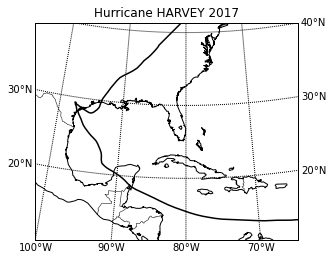

In [6]:
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-100.,llcrnrlat=10.,urcrnrlon=-60.,urcrnrlat=40.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-80.,
            resolution ='l',area_thresh=1000.)


#Convert latitude and longitude to coordinates X and Y
x, y = m(storm_lon, storm_lat)
m.plot(x,y,color='k')

    
# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary()
m.fillcontinents(color='w',lake_color='w')
m.drawparallels(np.arange(10,70,10),labels=[1,1,0,0])
m.drawmeridians(np.arange(-120,0,10),labels=[0,0,0,1])
titleString = 'Hurricane ' +  Hurr_Name.decode('utf-8') + " " + str(Hurr_Year)
plt.title(titleString)
plt.show()

In [ ]:
## Now we show how to use cartopy to draw a track


<Figure size 800x400 with 0 Axes>

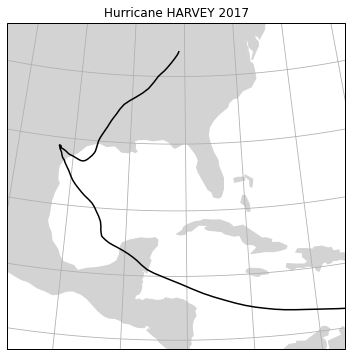

In [8]:
'''
Illustrate the use of cartopy
'''

import cartopy.crs as ccrs
import cartopy
#--------------------------------------------------------------------------------
# setup figure object
fig = plt.figure(figsize=(8,4), dpi=100)

# set map boundaries
south, north = 10, 40
west,  east   = -100, -70
central_lon, central_lat = (east+west)/2, (north+south)/2
extent = [west, east, south, north]


plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
#ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, facecolor='lightgray', edgecolor='lightgray')
#ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
#ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

# plot the track on the map
plt.plot(storm_lon,storm_lat,color='k',transform=ccrs.Geodetic())
titleString = 'Hurricane ' +  Hurr_Name.decode('utf-8') + " " + str(Hurr_Year)
plt.title(titleString)
plt.show()